Iteration 1: Mean = 0.247, Std Dev = 0.520
Iteration 2: Mean = 0.298, Std Dev = 0.073
Iteration 3: Mean = 0.290, Std Dev = 0.011
Iteration 4: Mean = 0.289, Std Dev = 0.001
Iteration 5: Mean = 0.289, Std Dev = 0.000
Converged at iteration 5


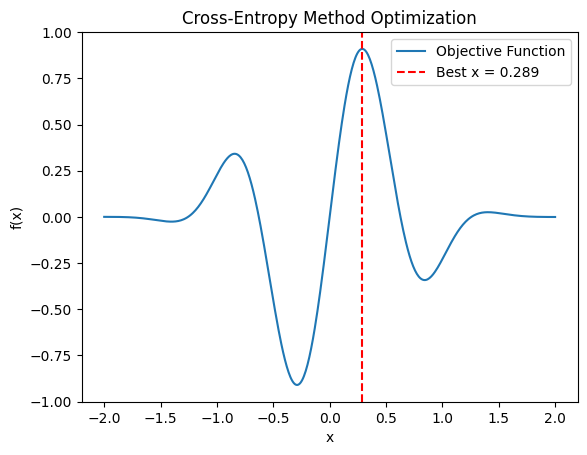

In [5]:
import numpy as np

class CrossEntropyMethod:
    def __init__(self, mean, std_dev, bounds, n_samples, elite_frac, epsilon):
        self.mean = mean 
        self.std_dev = std_dev  
        self.bounds = bounds  
        self.n_samples = n_samples  
        self.elite_frac = elite_frac  
        self.epsilon = epsilon  

def optimize(CEM, obj_func, n_iterations=50):
    lower, upper = CEM.bounds
    mean, std_dev = CEM.mean, CEM.std_dev

    for iteration in range(n_iterations):
        samples = np.random.normal(mean, std_dev, CEM.n_samples)
        samples = np.clip(samples, lower, upper)  

        scores = obj_func(samples)

        #Chọn các mẫu tốt nhất (elite samples)
        n_elite = int(CEM.elite_frac * CEM.n_samples)
        elite_indices = np.argsort(scores)[-n_elite:] 
        elite_samples = samples[elite_indices]

        # Cập nhật tham số phân phối Gaussian
        mean_new = np.mean(elite_samples)
        std_dev_new = np.std(elite_samples)

        #Kiểm tra điều kiện hội tụ
        if np.abs(mean - mean_new) < CEM.epsilon and np.abs(std_dev - std_dev_new) < CEM.epsilon:
            print(f"Converged at iteration {iteration }")
            break

        mean, std_dev = mean_new, std_dev_new

        print(f"Iteration {iteration + 1}: Mean = {mean:.3f}, Std Dev = {std_dev:.3f}")


    return mean


def objective_function(x):
    return np.sin(5 * x) * (1 - np.tanh(x**2))


bounds = (-2, 2)
initial_mean = np.random.uniform(bounds[0], bounds[1])
initial_std_dev = (bounds[1] - bounds[0]) / 4
cem = CrossEntropyMethod(
    mean=initial_mean,
    std_dev=initial_std_dev,
    bounds=bounds,
    n_samples=100,
    elite_frac=0.2,
    epsilon=1e-3
)


best_x = optimize(cem, objective_function)


import matplotlib.pyplot as plt

x = np.linspace(bounds[0], bounds[1], 500)
y = objective_function(x)

plt.plot(x, y, label="Objective Function")
plt.axvline(best_x, color='r', linestyle='--', label=f"Best x = {best_x:.3f}")
plt.legend()
plt.title("Cross-Entropy Method Optimization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
